
## Web Scraping

In [1]:
pip install html-table-parser-python3


**1) Scraping data from website**


In [2]:
# importing required libraries
import urllib.request
from html_table_parser.parser import HTMLTableParser

import pandas as pd

def url_get_contents(url):

	#making request to the website
	req = urllib.request.Request(url=url)
	f = urllib.request.urlopen(req)

	#reading contents of the website
	return f.read()

# defining the html contents of a URL.
xhtml = url_get_contents('https://en.wikipedia.org/wiki/List_of_data_breaches').decode('utf-8')

# Defining the HTMLTableParser object
p = HTMLTableParser()

# feeding the html contents in the HTMLTableParser object
p.feed(xhtml)

# print(xhtml) converting the parsed data to dataframe
print("\n\nPANDAS DATAFRAME\n")
data = pd.DataFrame(p.tables[0])
data.columns = ['Entity', 'Year', 'Records', 'Organization type', 'Method', 'Sources']
data = data.drop(0)
data.head()



PANDAS DATAFRAME



,Entity,Year,Records,Organization type,Method,Sources
1,21st Century Oncology,2016,"2,200,000",healthcare,hacked,5 6
2,500px,2020,"14,870,304",social networking,hacked,7
3,Accendo Insurance Co.,2020,"175,350",healthcare,poor security,8 9
4,Adobe Systems Incorporated,2013,"152,000,000",tech,hacked,10
5,Adobe Inc.,2019,"7,500,000",tech,poor security,11 12


In [3]:
import requests
from bs4 import BeautifulSoup
page = requests.get("https://en.wikipedia.org/wiki/List_of_data_breaches")
soup = BeautifulSoup(page.content, 'html.parser')
urls = soup.find_all('ol', class_ = "references")
links = []
for ind in data.index:
    cite_inds = data['Sources'][ind].split()
    links_at_ind = []
    for ind in cite_inds:
      citeid = "cite_note-" + ind
      z = urls[0].find('li', id = citeid)
      if z != None:
          y = z.find('a', class_="external text", href = True)
          if y != None:
              links_at_ind.append(y['href'])
    links.append(links_at_ind)  
data.insert(6, "Links", links, True)


In [4]:
data.head()

,Entity,Year,Records,Organization type,Method,Sources,Links
1,21st Century Oncology,2016,"2,200,000",healthcare,hacked,5 6,[http://cbs12.com/news/local/21st-century-onco...
2,500px,2020,"14,870,304",social networking,hacked,7,[]
3,Accendo Insurance Co.,2020,"175,350",healthcare,poor security,8 9,[https://www.prnewswire.com/news-releases/acce...
4,Adobe Systems Incorporated,2013,"152,000,000",tech,hacked,10,[https://www.theverge.com/2013/11/7/5078560/ov...
5,Adobe Inc.,2019,"7,500,000",tech,poor security,11 12,[https://www.comparitech.com/blog/information-...


In [5]:
# exporting scraped data to csv
data.to_csv('scrapedData.csv')

# Structure of Data (Normal routine check)

In [6]:
# Shape of the dataframe
data.shape
# data contsists of 344 rows and 7 columns

(344, 7)

In [7]:
# Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 344
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             344 non-null    object
 1   Year               344 non-null    object
 2   Records            344 non-null    object
 3   Organization type  344 non-null    object
 4   Method             344 non-null    object
 5   Sources            344 non-null    object
 6   Links              344 non-null    object
dtypes: object(7)
memory usage: 31.5+ KB


In [8]:
# Details of Data
data.describe()

,Entity,Year,Records,Organization type,Method,Sources,Links
count,344,344,344,344,344,344,344
unique,323,21,253,64,24,303,279
top,Facebook,2011,unknown,web,hacked,36,[]
freq,5,34,20,53,191,25,66


# Data Cleaning

### Data quality check 

**1) Checking for Empty or Null values**

In [9]:
# Number of missing values of all the columns.
data.isnull().sum(axis = 0)

Entity               0
Year                 0
Records              0
Organization type    0
Method               0
Sources              0
Links                0
dtype: int64

**2) Dropping Invalid Data points**


In [10]:
pd.options.mode.chained_assignment = None  # default='warn'
# removing commas from Records col
data['Records'] = data['Records'].str.replace(',', '')

# Get a bool series representing which row satisfies the condition i.e. True for row in which value of 'Records' column is numeric
data['Records_isdigit']= data['Records'].str.isdigit()
datatoberemoved = data.loc[data['Records_isdigit'] != True]
print('Entries having non-numeric records value have to be dropped.')
datatoberemoved.head(2)

Entries having non-numeric records value have to be dropped.


,Entity,Year,Records,Organization type,Method,Sources,Links,Records_isdigit
11,Amazon Japan G.K.,2019,unknown,web,accidentally published,20 21,"[https://japan.cnet.com/article/35143123/, htt...",False
27,Australian Immigration Department,2015,G20 world leaders,government,accidentally published,39,[https://www.theguardian.com/world/2015/mar/30...,False


In [36]:
seriesObj = data.apply(lambda x: True if x['Records_isdigit'] == False else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows, 'entries have non-numeric records so dropping those.')

# dropping rows having non-numeric value of 'Records' column
filtered_df = data[data['Records_isdigit'] == True]
filtered_df.drop(['Records_isdigit'], axis = 1, inplace=True)
filtered_df.head()

48 entries have non-numeric records so dropping those.


,Entity,Year,Records,Organization type,Method,Sources,Links
1,21st Century Oncology,2016,2200000,healthcare,hacked,5 6,[http://cbs12.com/news/local/21st-century-onco...
2,500px,2020,14870304,social networking,hacked,7,[]
3,Accendo Insurance Co.,2020,175350,healthcare,poor security,8 9,[https://www.prnewswire.com/news-releases/acce...
4,Adobe Systems Incorporated,2013,152000000,tech,hacked,10,[https://www.theverge.com/2013/11/7/5078560/ov...
5,Adobe Inc.,2019,7500000,tech,poor security,11 12,[https://www.comparitech.com/blog/information-...


In [12]:
# shape of filtered data
filtered_df.shape

(296, 7)

**3) Changing the data types of required columns**


In [13]:
# Converting Records Data from Object type to Integer type
filtered_df['Records'] = pd.to_numeric(filtered_df['Records'])
filtered_df.info()
filtered_df.to_csv('filtereddata.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 1 to 342
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             296 non-null    object
 1   Year               296 non-null    object
 2   Records            296 non-null    int64 
 3   Organization type  296 non-null    object
 4   Method             296 non-null    object
 5   Sources            296 non-null    object
 6   Links              296 non-null    object
dtypes: int64(1), object(6)
memory usage: 18.5+ KB


# Exploratory Data Analysis (EDA) and Data Analysis

 **Handling Outliers**

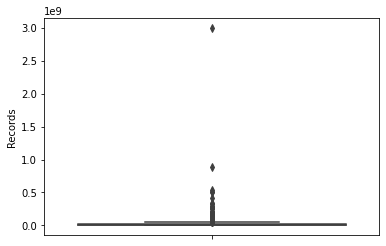

In [14]:
import seaborn as sns
sns.boxplot(y=filtered_df['Records'])

Using the above box plot we get to know that Yahoo is the outlier having very large value of records exposed.<br>
As we are not required to inspect average value of records as per the data, we are not removing this outlier.

 **Analyzing the distribution of breaches according to organization type**

No. of organisation types : 55
   Entries Organization type
0     49.0               web
1     45.0        healthcare
2     36.0         financial
3     27.0        government
4     20.0            retail
5     14.0              tech
6     12.0          academic
7     12.0          telecoms
8     10.0            gaming
9     71.0            Others 



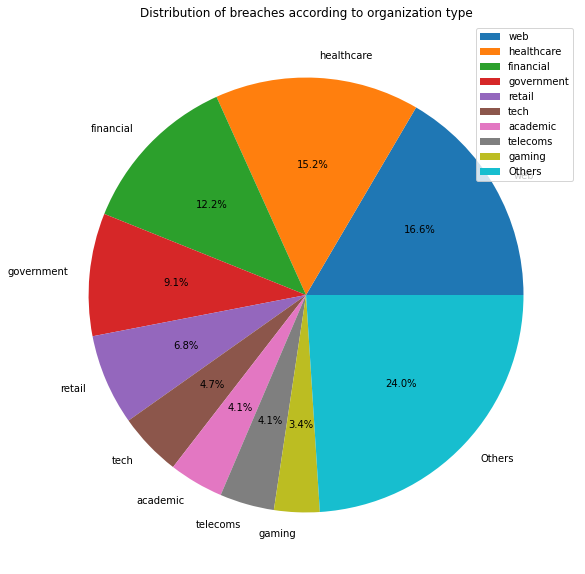

In [15]:
# Distribution of breaches according to organization type
import matplotlib.pyplot as plt

n = len(pd.unique(filtered_df['Organization type']))
print("No. of organisation types :",  n)

df0 = pd.DataFrame()
othersCount = 0
for idx, name in enumerate(filtered_df['Organization type'].value_counts().index.tolist()):
    if idx < 9:
        dftemp = {'Organization type' : name, 'Entries' : filtered_df['Organization type'].value_counts()[idx]}
        df0 = df0.append(dftemp, ignore_index = True)
    else:
        othersCount = othersCount + filtered_df['Organization type'].value_counts()[idx]

dftemp = {'Organization type' : 'Others', 'Entries' : othersCount}
df0 = df0.append(dftemp, ignore_index = True)
print(df0, "\n")

# plotting pie chart for the data
plot = df0.plot.pie(title = 'Distribution of breaches according to organization type', y = 'Entries', figsize = (10,10), legend = True, labels = df0['Organization type'], autopct='%1.1f%%')
plot.yaxis.set_visible(False)

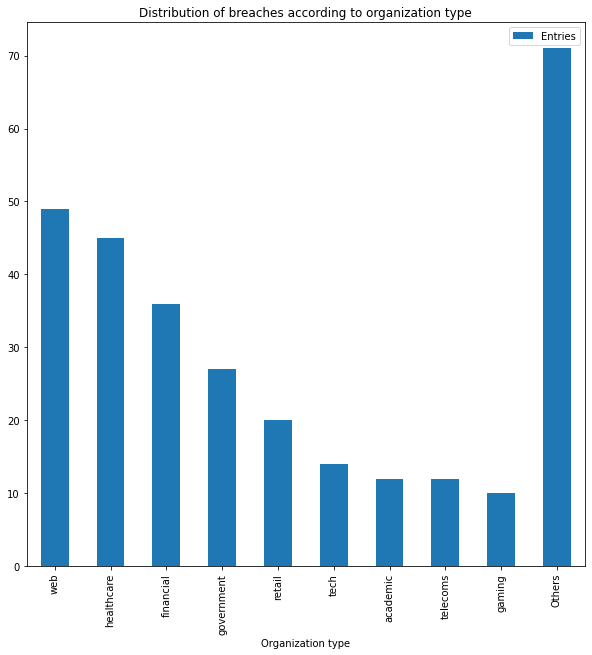

In [16]:
# bar chart
plot = df0.plot.bar(title = 'Distribution of breaches according to organization type', figsize = (10,10), legend = True, x = 'Organization type', y='Entries')

**Analyzing the distribution of breaches according to methods**

No. of methods in dataset : 23
   Entries                    Method
0    156.0                    hacked
1     36.0             poor security
2     32.0       lost / stolen media
3     18.0                inside job
4     17.0    accidentally published
5     15.0    lost / stolen computer
6      4.0                   unknown
7      2.0  poor security/inside job
8      2.0  improper setting, hacked
9     14.0                    Others 



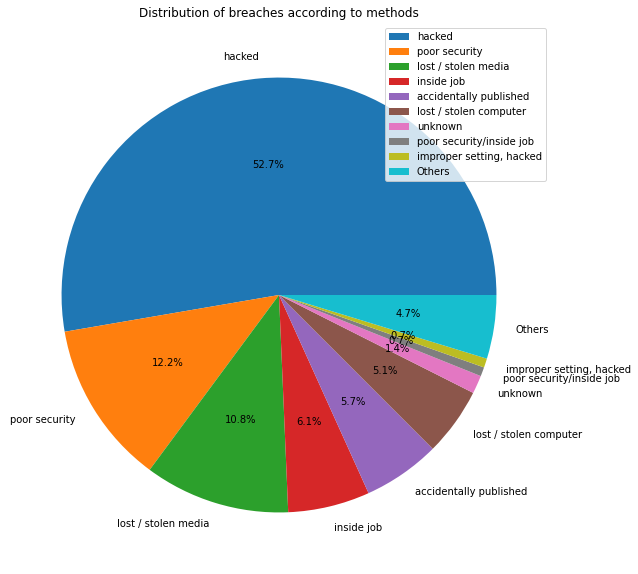

In [17]:
# Distribution of breaches according to methods
m = len(pd.unique(filtered_df['Method']))
print("No. of methods in dataset :",  m)

df1 = pd.DataFrame()
othersCount = 0
for idx, name in enumerate(filtered_df['Method'].value_counts().index.tolist()):
    if idx < 9:
        dftemp = {'Method' : name,'Entries' : filtered_df['Method'].value_counts()[idx]}
        df1 = df1.append(dftemp, ignore_index = True)
    else:
        othersCount = othersCount + filtered_df['Method'].value_counts()[idx]

dftemp = {'Method' : 'Others', 'Entries' : othersCount}
df1 = df1.append(dftemp, ignore_index = True)
print(df1, "\n")

# plotting pie chart for the data
plot = df1.plot.pie(title = 'Distribution of breaches according to methods', y = 'Entries', figsize = (10,10), legend = True, labels = df1['Method'], autopct='%1.1f%%')
plot.yaxis.set_visible(False)

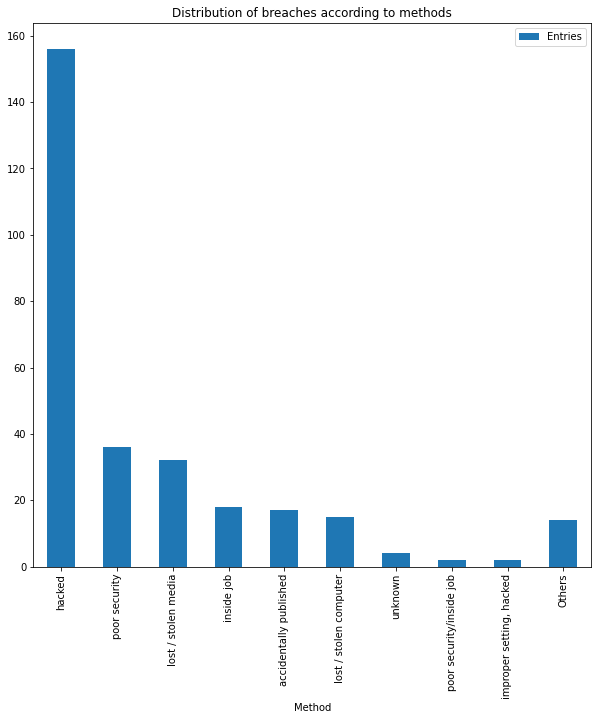

In [18]:
# bar chart
plot = df1.plot.bar(title = 'Distribution of breaches according to methods', figsize = (10,10), legend = True, x = 'Method', y='Entries')

**Analyzing the year wise distribution of breaches**

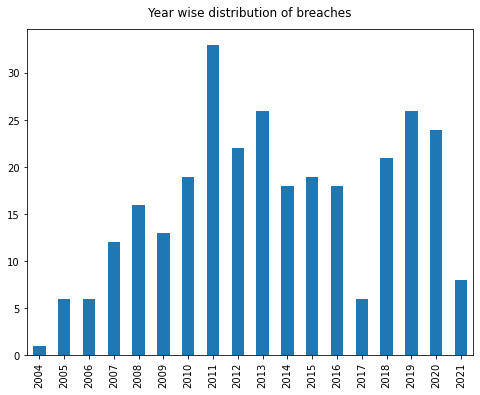

In [19]:
df2 = pd.DataFrame()
for index, row in filtered_df.iterrows():
    if len(row['Year']) < 5:
        dftemp = {'Entity': row['Entity'], 'Year': str(row['Year']), 'Records': row['Records'], 'Organization type': row['Organization type'], 'Method': row['Method'], 'Sources': row['Sources'], 'Links': row['Links']}
        df2 = df2.append(dftemp, ignore_index = True)
df2['Year'] = df2['Year'].str.replace(',', '')
df2.sort_values('Year', axis = 0, ascending = True, inplace = True)

#  plotting bar chart for the data
df2['Year'].value_counts().sort_index(ascending = True).plot(kind='bar', figsize=(8, 6))
plt.title("Year wise distribution of breaches", y=1.02);

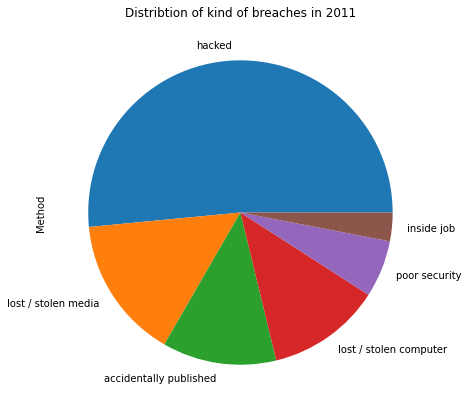

In [54]:
df2011 = filtered_df.loc[filtered_df['Year'] == '2011']
df2011['Method'].value_counts().plot(kind='pie', title='Distribtion of kind of breaches in 2011', figsize=(7, 7))

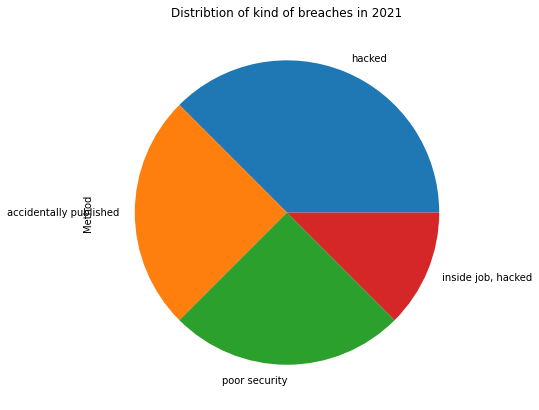

In [53]:
df2021 = filtered_df.loc[filtered_df['Year'] == '2021']
df2021['Method'].value_counts().plot(kind='pie', title='Distribtion of kind of breaches in 2021', figsize=(7, 7))

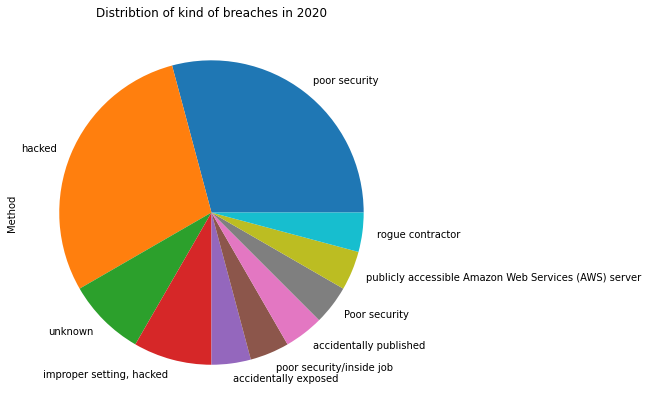

In [52]:
df2020 = filtered_df.loc[filtered_df['Year'] == '2020']
df2020['Method'].value_counts().plot(kind='pie', title='Distribtion of kind of breaches in 2020', figsize=(7, 7))

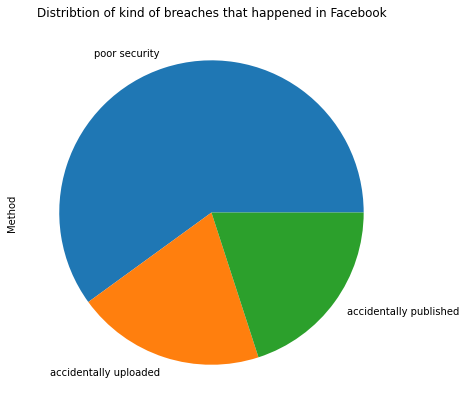

In [55]:
fbdf = filtered_df.loc[filtered_df['Entity'] == 'Facebook']
fbdf['Method'].value_counts().plot(kind='pie', title='Distribtion of kind of breaches that happened in Facebook', figsize=(7, 7))

**Companies that were breached multiple times in time period 2004-2021**

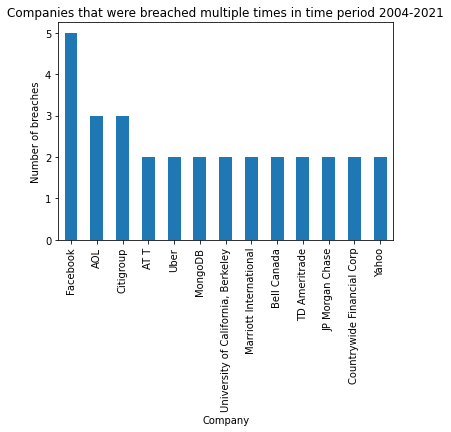

In [20]:
filtered_df['Entity'].value_counts().loc[lambda x : x>1].plot(kind='bar', title='Companies that were breached multiple times in time period 2004-2021', xlabel = 'Company', ylabel = 'Number of breaches')

**Social Networking Companies who were breached**


In [56]:
socialnetdf = filtered_df.loc[filtered_df['Organization type'] == 'social network']
techdf = filtered_df.loc[filtered_df['Organization type'] == 'tech']
socialnetdf.head(10)

,Entity,Year,Records,Organization type,Method,Sources,Links
107,Facebook,2013,6000000,social network,accidentally published,134,[https://packetstormsecurity.com/news/view/227...
108,Facebook,2018,50000000,social network,poor security,135 136 137 138 139 140,[https://social.techcrunch.com/2018/09/28/ever...
109,Facebook,2019,540000000,social network,poor security,141 142,[https://www.cbsnews.com/news/millions-faceboo...
110,Facebook,2019,1500000,social network,accidentally uploaded,143,[https://www.businessinsider.com/facebook-uplo...
111,Facebook,2019,267000000,social network,poor security,144 145,[https://www.cnet.com/news/millions-of-faceboo...
127,Google Plus,2018,500000,social network,poor security,164 165 166,[https://arstechnica.com/tech-policy/2018/10/g...
144,Instagram,2020,200000000,social network,poor security,194,[]
337,Zynga,2019,173000000,social network,hacked,390 391,[https://venturebeat.com/2019/09/30/words-with...


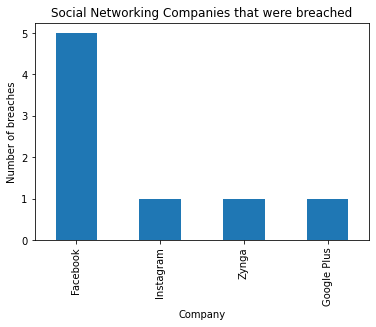

In [22]:
socialnetdf['Entity'].value_counts().plot(kind='bar', title='Social Networking Companies that were breached', xlabel = 'Company', ylabel = 'Number of breaches')

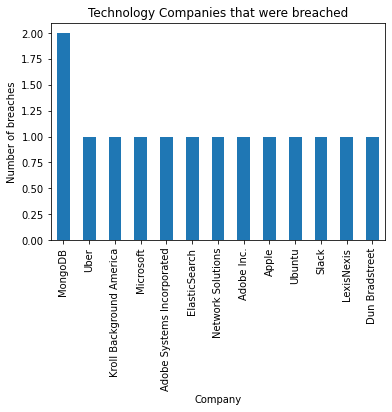

In [57]:
techdf['Entity'].value_counts().plot(kind='bar', title='Technology Companies that were breached', xlabel = 'Company', ylabel = 'Number of breaches')

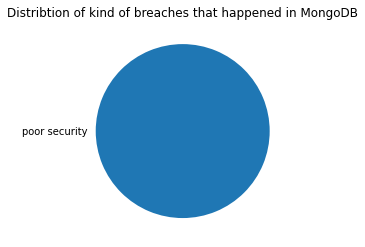

In [63]:
fbdf = filtered_df.loc[filtered_df['Entity'] == 'MongoDB']
fbdf['Method'].value_counts().plot(kind='pie', title='Distribtion of kind of breaches that happened in MongoDB', ylabel="")

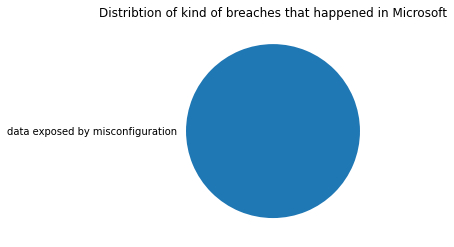

In [64]:
fbdf = filtered_df.loc[filtered_df['Entity'] == 'Microsoft']
fbdf['Method'].value_counts().plot(kind='pie', title='Distribtion of kind of breaches that happened in Microsoft',  ylabel="")

**Creating Dummies for categorial columun**

In [23]:
dum1 = pd.get_dummies(filtered_df['Method'], drop_first = True)
dum1.head()

,Poor security,accidentally exposed,accidentally published,accidentally uploaded,data exposed by misconfiguration,hacked,"improper setting, hacked",inside job,"inside job, hacked",intentionally lost,lost / stolen computer,lost / stolen media,misconfiguration/poor security,poor security,poor security / hacked,poor security/inside job,publicly accessible Amazon Web Services (AWS) server,rogue contractor,social engineering,unknown,unprotected api,unsecured S3 bucket
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
categorizeddf = pd.concat([filtered_df, dum1], axis=1)
categorizeddf.head()

,Entity,Year,Records,Organization type,Method,Sources,Links,Poor security,accidentally exposed,accidentally published,accidentally uploaded,data exposed by misconfiguration,hacked,"improper setting, hacked",inside job,"inside job, hacked",intentionally lost,lost / stolen computer,lost / stolen media,misconfiguration/poor security,poor security,poor security / hacked,poor security/inside job,publicly accessible Amazon Web Services (AWS) server,rogue contractor,social engineering,unknown,unprotected api,unsecured S3 bucket
1,21st Century Oncology,2016,2200000,healthcare,hacked,5 6,[http://cbs12.com/news/local/21st-century-onco...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,500px,2020,14870304,social networking,hacked,7,[],0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Accendo Insurance Co.,2020,175350,healthcare,poor security,8 9,[https://www.prnewswire.com/news-releases/acce...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Adobe Systems Incorporated,2013,152000000,tech,hacked,10,[https://www.theverge.com/2013/11/7/5078560/ov...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Adobe Inc.,2019,7500000,tech,poor security,11 12,[https://www.comparitech.com/blog/information-...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [40]:
df3 = pd.DataFrame()
for index, row in filtered_df.iterrows():
    if len(row['Year']) < 5:
        dftemp = {'Entity': row['Entity'], 'Year': str(row['Year']), 'Records': row['Records'], 'Organization type': row['Organization type'], 'Method': row['Method'], 'Sources': row['Sources'], 'Links': row['Links']}
        df3 = df3.append(dftemp, ignore_index = True)
df3['Year'] = df3['Year'].str.replace(',', '')
df3['Year'] = df3['Year'].astype('int32')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['Entity'] = le.fit_transform(df3['Entity'])
le1 = LabelEncoder()
df3['Organization type'] = le1.fit_transform(df3['Organization type'])
le2 = LabelEncoder()
df3['Method'] = le2.fit_transform(df3['Method'])

In [41]:
df3.head()

,Entity,Links,Method,Organization type,Records,Sources,Year
0,1,[http://cbs12.com/news/local/21st-century-onco...,6,23,2200000,5 6,2016
1,2,[],6,40,14870304,7,2020
2,5,[https://www.prnewswire.com/news-releases/acce...,14,23,175350,8 9,2020
3,7,[https://www.theverge.com/2013/11/7/5078560/ov...,6,42,152000000,10,2013
4,6,[https://www.comparitech.com/blog/information-...,14,42,7500000,11 12,2019


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

X = df3.drop(columns=['Method', 'Links', 'Sources'])
y = df3['Method']

clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Text(0.5, 1.0, 'Feature Importance with RFC')

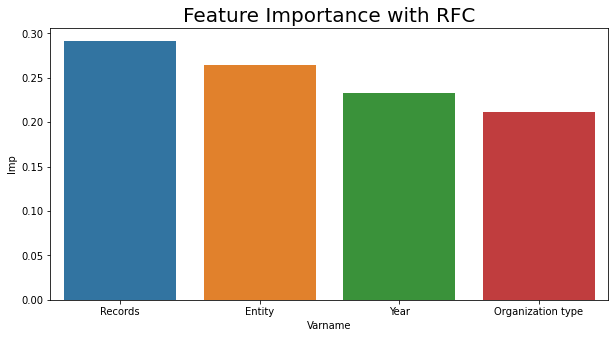

In [44]:
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": clf.feature_importances_}).sort_values(by="Imp", ascending=False)
    
from matplotlib import pyplot
a4_dims = (10, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.barplot(x='Varname',y='Imp', data=imp_df,ax=ax)
plt.title('Feature Importance with RFC', fontsize=20)